# Homework 2

**Before you start:** Read Chapter 3 Data Visualization and Chapter 4 Dimension Reduction in the textbook.

**Note:** Please make sure your plots are complete and presentable with a title, proper axis names, labels and legends if applicable.

Please enter the code along with your comments in the **TODO** sections.

Please refer to the **Hint** section if you do not know where to start. 

Alternative solutions are welcomed.

## Part 1: Advanced Data Visualization

### Problem 1 ##

**Dataset:** [Mismanaged waste](https://ourworldindata.org/grapher/mismanaged-plastic-waste?tab=chart&time=earliest..latest)

**Introduction:** Jambeck et al. quantified municipal and plastic waste streams from coastal populations in 2010 with projections to the year 2025. The authors define mismanaged and inadequately managed waste as follows: "mismanaged waste is material that is either littered or inadequately disposed. Inadequately disposed waste is not formally managed and includes disposal in dumps or open, uncontrolled landfills, where it is not fully contained. Mismanaged waste could eventually enter the ocean via inland waterways,
wastewater outflows, and transport by wind or tides. "

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pylab as plt

In [2]:
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("mismanaged-waste-global-total.csv") 
df.head()

ModuleNotFoundError: No module named 'google'

**TODO:**

*  Use a choropleth map to present the amount of mismanaged waste by country
*   The label (hover) should include the country name and percentage of mismanaged waste
*  Interpret your key findings from the map graph
*  Considering the manufacturing volume of each country, is this graph misleading?

In [ ]:
fig = px.choropleth(df, locations="Code",
                    color="Mismanaged waste (% global total) (% of global total)", # lifeExp is a column of gapminder
                    hover_name="Entity", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()
##China take the most portion of mismanaged waste water.
##Because of China's population amount and manufactural industry size, the view that China produce the most polution is misleading.

**Hint:** 

* The variable "code" contains [three letters ISO country codes](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3). 
* [Use the built-in country code to create a choropleth map.](https://plotly.com/python/choropleth-maps/#using-builtin-country-and-state-geometries)



### Problem 2 ##

**Dataset:** [Plastic disposal dataset](https://ourworldindata.org/plastic-pollution)

**Information:** Plastic disposal dataset methods shows how has global plastic waste disposal method changed over time. In the chart we see the share of global plastic waste that is discarded, recycled or incinerated from 1980 through to 2015.


In [ ]:
#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_excel("activity.xlsx") 
df.head()

Saving activity.xlsx to activity.xlsx


,year,Value,Type
0,1960,88.1,Generation
1,1960,NaN,Composting*
2,1960,5.6,Recycling
3,1960,0.0,Combustion with energy recovery
4,1960,82.5,Landfilling and other disposal


**TODO:**
*  Use an animated bar chart to indicate the change of trash disposal method through the years
*  Interpret your key findings from the graph


In [ ]:
fig = px.bar(df, x="Type", y="Value", color="Type",
  animation_frame="year", range_y=[0,400])
fig.show()
##Through the time changes, the amount of plastic disposal keep increasing, the type of disposal method became varied. The generation method is always the most used.

**Hint:** [Animated Bar Charts with Plotly Express](https://plotly.com/python/animations/#animated-bar-charts-with-plotly-express)




### Problem 3 ##

**Dataset:** [Global Fortune 500](https://www.kaggle.com/edgarhuichen/fortune-global-500)

**Introduction:** Fortune Global 500 List is a list of largest corporations worldwide which are measured by their total fiscal year revenues. Companies rankings sorted by total revenues for their respective fiscal years ended on or before March 31 of the relevant year.

In [ ]:
#Upgrade the package "plotly" before you start to avoid future syntax error
#You only need to upgrade it once
!pip install plotly --upgrade


     |████████████████████████████████| 27.7 MB 1.7 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
#Import packages
import pandas as pd
import numpy as np
import plotly.express as px

#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("Global Fortune 500.csv") 
df.head()

Saving Global Fortune 500.csv to Global Fortune 500.csv


,Rank,Company Name,Country,Number of Employees,Previous Rank,Revenues($millions),Revenue Change,Profits($millions),Profit Change,Assets($millions),Unnamed: 10,Unnamed: 11
0,1,Walmart,USA,"2,300,000",1,485873,0.80%,13643,-7.20%,198825,NaN,NaN
1,2,State Grid,China,"926,067",2,315199,-4.40%,9571.3,-6.20%,489838,NaN,NaN
2,3,Sinopec Group,China,"713,288",4,267518,-9.10%,1257.9,-65.00%,310726,NaN,NaN
3,4,China National Petroleum,China,"1,512,048",3,262573,-12.30%,1867.5,-73.70%,585619,NaN,NaN
4,5,Toyota Motor,Japan,"364,445",8,254694,7.70%,16899.3,-12.30%,437575,NaN,NaN


**TODO:**
*  Build a treemap of the companies with "country" as the first hierarchy and "company" as the second hierarchy
*  The size of each block should indicate the corresponding company's revenue
*  Interpret your key findings from the treemap

In [ ]:
fig = px.treemap(df, path=[px.Constant("world"), 'Country', 'Company Name'], values='Revenues($millions)')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()
##China and America take the half of the world's company revenues.

**Hint:** [Build a treemap with Plotly](https://plotly.com/python/treemaps/)




**If you are interested (this part is not graded):**
*  Use the zooming and panning function to offer the users an option to zoom in any target country for a detailed analysis



### Problem 4 ##

**Dataset:** [Air Quality](https://archive.ics.uci.edu/ml/datasets/Air+Quality)

**Introduction:** The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.

In [ ]:
#Import required libraries
import scipy.stats as stats
from sklearn import preprocessing
%matplotlib inline

#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_excel("Air Quality.xlsx") 
df.head()

Saving Air Quality.xlsx to Air Quality.xlsx


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


**TODO:**
*  Plot a correlation heatmap for the Air Quality dataset
*  Interpret your key findings from the correlation heatmap

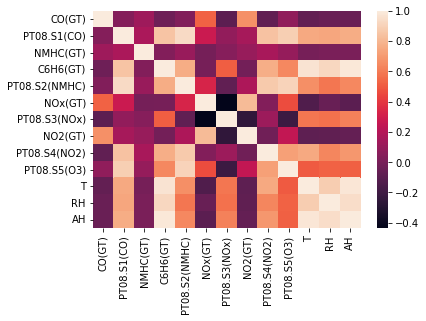

In [ ]:
sns.heatmap(df.corr())
##NOx(GT) is negative correlated to PT08.S3(NOx), AH and RH and T is positive correlated.

**Hint:** [Build a heatmap with Seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

## Part 2: Dimension Reduction

### Problem 5

**Dataset:** [Wine Classification Dataset](https://archive.ics.uci.edu/ml/datasets/wine)

**Introduction:** These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.


In [3]:
#Import the built-in dataset (Wine recognition) for this problem
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
np.set_printoptions(suppress=True, precision=8)

wine = load_wine()
X = pd.DataFrame(wine['data'], columns=wine['feature_names'])
y = wine['target']

In [4]:
X['target'] = y

In [5]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
X.to_csv('/content/drive/My Drive/wine.csv')

**TODO1:**

*  Calulate the first two principal component scores with eigen values and vectors on the RAW data (without standardization). 

*  Note that you are expected to perform matrix multiplication and eigen value calculation **only** with the package Numpy.

In [9]:
##X_meaned = X - np.mean(X, axis=0)
cov_mat = np.cov(X, rowvar = False)
eig_val, eig_vect = np.linalg.eigh(cov_mat)
print('eig_val', eig_val)
print('eig_vect', eig_vect)

eig_val [    0.00809266     0.02076267     0.0349273      0.04620262
     0.08637843     0.11373332     0.15527896     0.28700697
     0.86816657     1.28578826     5.10080996     9.53119601
   172.53659575 99202.03073131]
eig_vect [[ 0.01342199  0.00424033 -0.03477671 -0.08907492 -0.05759022  0.10429717
  -0.34902803 -0.89011629  0.20208045 -0.04893261  0.1369886  -0.01830354
  -0.00120427  0.00165926]
 [-0.01205487 -0.0632357   0.03573628  0.00774362  0.03361008  0.01022552
   0.07552074  0.14685806  0.80383993  0.52893096  0.15673938 -0.12455946
  -0.00215953 -0.00068102]
 [-0.16234458  0.08648809 -0.89148686  0.35325578  0.10716134  0.06888147
   0.15052809 -0.0503493   0.0416939  -0.02584566 -0.01204712 -0.05129289
  -0.004594    0.00019491]
 [-0.00006483 -0.00026949  0.05931059 -0.00265862  0.00998036 -0.00244128
  -0.01139207 -0.0359372  -0.02385952 -0.06961127 -0.3569901  -0.92809986
  -0.0264607  -0.0046713 ]
 [ 0.00227127 -0.00050097  0.00262028 -0.00163841 -0.00086471 -0.001

**Hint:** [Eigen value calculation with Numpy](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)

**TODO2:**

*  Use the function PCA() on the RAW data to calculate the priciple components
*  For each principle component, what is the explained variance, proportion variance, and cummulative proportion of variance?
*  Present the first two principal component scores

In [10]:
t2 = X.drop(columns=['target'])
pcs = PCA()
pcs = PCA(n_components = 2)
pcs.fit(t2.dropna(axis=0))
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance':pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
print(pcsSummary)
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary.round(4)
pcsComponents = pd.DataFrame(pcs.components_.transpose(), columns=['PC1', 'PC2'],
                            index = t2.columns)
pcsComponents
scores = pd.DataFrame(pcs.transform(t2),
                     columns = ['PC1','PC2'])
scores.head(9)

   Standard deviation  Proportion of variance  Cumulative proportion
0          314.963156                0.998091               0.998091
1           13.135268                0.001736               0.999827


,PC1,PC2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995
5,703.231192,-0.332159
6,542.971581,-13.518967
7,548.401860,11.449432
8,298.036863,-8.180158


**TODO3:**

*  Use the function PCA() on the STANDARDIZED data to calculate the priciple components
*  For each principle component, what is the explained variance, proportion variance, and cummulative proportion of variance?
*  Present the first two principal component scores

In [11]:
from sklearn.preprocessing import StandardScaler
t3 = StandardScaler().fit_transform(X.iloc[:,0:13])
pcs = PCA(n_components = 2)
pc = pcs.fit_transform(t3)
pc_df = pd.DataFrame(data = pc, columns = ['PC1','PC2'])
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance':pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
print(pcsSummary_df)
pcsSummary = pcsSummary.transpose()
pcsSummary.round(4)
pcsComponents = pd.DataFrame(pcs.components_.transpose(), columns=['PC1', 'PC2'])
pcsComponents
scores = pd.DataFrame(pcs.transform(t3),
                     columns = ['PC1','PC2'])
scores.head(9)

   Standard deviation  Proportion of variance  Cumulative proportion
0            2.175417                0.361988               0.361988
1            1.584639                0.192075               0.554063


,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
5,3.050254,-2.122401
6,2.449090,-1.174850
7,2.059437,-1.608963
8,2.510874,-0.918071


**TODO4:**

*  Explain why it is important to normalize numerical variables before PCA
*  Back up your reasons with the PCA results above

In [ ]:
##Normalization projects the data to directions with largest variance, and as we can see from above that PC1 which is the direction differs alot before and after the normalization.

**TODO5:**

*  Plot the records on a 2D plane defined by the first two PCs calculated with standardized data
*  Use color to differentiate the classes of wine (variable name "target")
*  Interpret the plot

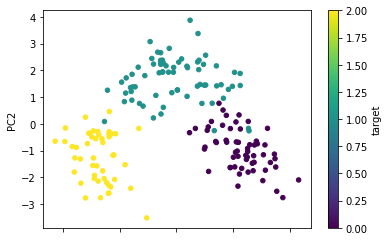

In [ ]:
scores['target'] = y
ax2 = scores.plot.scatter(x='PC1', y='PC2', c='target', colormap='viridis')

### Problem 6

**Dataset:** Life Expectancy

**Introduction:** The above dataset gives life expectancy related data for 37 countries in2014. 

Consider only the following variables in your analysis: 'GDP', 'Income composition of resources', 'Schooling', and 'Total expenditure'.

In [ ]:
#Import useful package
from sklearn.manifold import MDS

#Load the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("Life Expectancy.csv") 
df.head()

Saving Life Expectancy.csv to Life Expectancy.csv


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,18.6,86,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,Australia,2014,Developed,82.7,6,1,9.71,10769.363050,91.0,340,66.1,1,92,9.42,92,0.1,62214.691200,2346694.0,0.6,0.6,0.936,20.4
2,Austria,2014,Developed,81.4,66,0,12.32,8350.193523,98.0,117,57.1,0,98,11.21,98,0.1,51322.639970,8541575.0,1.8,2.0,0.892,15.9
3,Bangladesh,2014,Developing,71.4,132,98,0.01,10.446403,97.0,289,17.7,121,97,2.82,97,0.1,184.565430,15945279.0,18.1,18.6,0.570,10.0
4,Belgium,2014,Developed,89.0,76,0,12.60,7163.348923,98.0,70,63.4,1,99,1.59,99,0.1,47439.396840,112957.0,1.0,1.0,0.890,16.3


**TODO:**

* Standardize the numeric variables in the given data frame
* Run MDS() (Multi Dimensional Scaling) on the standardized data
* Plot data points on a 2D plane defined by the first two components
* Use color to differentiate the statues of each country with legend
* Use text label to specify the country name for each point
* Comment your findings from the graph

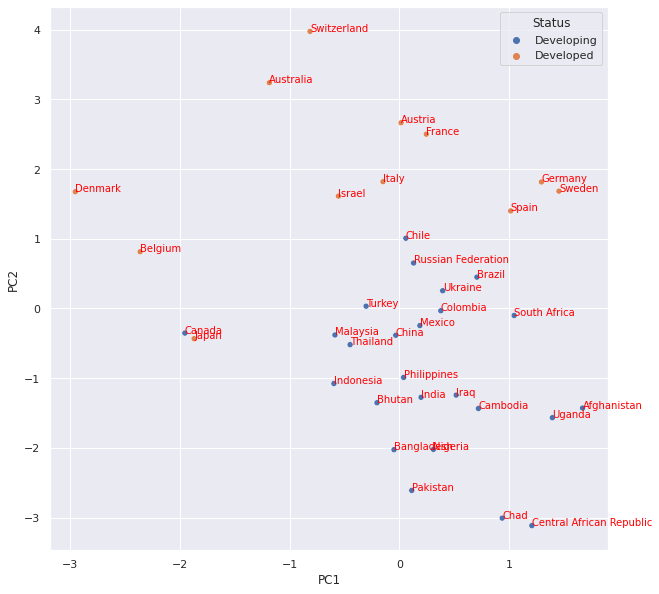

In [ ]:
df6 = df[['GDP', 'Income composition of resources','Schooling','Total expenditure']]
p6 = StandardScaler().fit_transform(df6)
mds = MDS(n_components=2)
md = mds.fit_transform(p6)
md_df = pd.DataFrame(data = md, columns = ['PC1','PC2'])
md_df['Status'] = df['Status']
md_df['Country'] = df['Country']
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x="PC1", y="PC2", data=md_df, hue="Status")
for i in range(md_df.shape[0]):
 plt.text(x=md_df.PC1[i], y=md_df.PC2[i] ,s=md_df.Country[i], 
          fontdict=dict(color='red',size=10))